In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
c = twint.Config()
c.Search = "Inception"
c.Limit = 7000
c.Since = "2010-04-01"
c.Until = "2011-01-29"
c.Pandas = True

# Run
twint.run.Search(c)

30776953027956739 2011-01-27 18:59:32 -0500 <EmilyNMurray> Watching inception. Joseph gordon-levitt. Oh yeah :)
30776922921246720 2011-01-27 18:59:24 -0500 <LisaAsanuma> Ken Watanabe &lt;---Reason to see Inception more than once. (See also: Tom Hardy)
30776462000791552 2011-01-27 18:57:34 -0500 <MsAllurer> #NW Inception! yh yh yh.. stale girl.. waheva.. According to ibo proverb translated to english "The older the wine, the sweeter the taste"
30776412738682880 2011-01-27 18:57:23 -0500 <AlexaChill> 'Black Swan', 'The Social Network', 'Inception' si 'Eat Pray Love 'recuperate si bifate . Another suggestions?
30776381751173121 2011-01-27 18:57:15 -0500 <MarioCayetano> I just voted for Inception for #BestScreenplay on Oscar.com via @TheAcademy.  http://soc.li/MiotdtD
30776214385860608 2011-01-27 18:56:35 -0500 <forrestfire101> @spastikchuwawa +Inception soundtrack
30775911884390400 2011-01-27 18:55:23 -0500 <WillieGotWings> FINALLY watching Inception, my dad fixed my surround sound
307759

30765682517872641 2011-01-27 18:14:44 -0500 <QuixoticExotic> @tomlafferty I understand that Nolan either drinks a lot of coffee or smokes a lot of pot. #inception
30765597721624576 2011-01-27 18:14:24 -0500 <skye_writer> I've got almost all my homework done (almost because I can't watch Inception now, roomie is sleeping). Should I write or blog? #asktwitter
30765583129645056 2011-01-27 18:14:21 -0500 <tvsoup> Αδικήθηκε το Inception στα Oscars;:  Σύμφωνα με τον διακεκριμένο κινηματογραφικό συνθέτη Hans Zimmer, που είναι ...  http://bit.ly/dWk805
30765554558046208 2011-01-27 18:14:14 -0500 <advergirling> @clickeric I should have taken a picture of you taking the pic and it would have been like inception
30765528087797760 2011-01-27 18:14:08 -0500 <blue_blazered> Criando coragem pra tentar ver Inception de novo.
30765317705699328 2011-01-27 18:13:17 -0500 <ishmaelcasanova> Inception is my favorite movie. #JosephGordonLevittIWantToBoneAndMarryYou
30765307740037120 2011-01-27 18:13:15 -0500

30756717201457152 2011-01-27 17:39:07 -0500 <mattsmithies> @MelissaLR soz was watchin inception again. too intense for interwebz.
30756530240364544 2011-01-27 17:38:22 -0500 <AngelReignsNYC> Best movie ever RT @traviesa694: @RaquelReign Inception! But dont even blink while watching it or you'll get lost!
30756527597953024 2011-01-27 17:38:22 -0500 <Manoloseame> RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT @Javierk812 RT RT RT y retweet del retweet...... Inception 2
30756489543028737 2011-01-27 17:38:13 -0500 <harrieverveer> @Catcch haha zo heb ik het niet begrepen, maar ja hoor je mag best ook komen. Ze wilde alleen wel Inception zien geloof ik :-p
30756461961285633 2011-01-27 17:38:06 -0500 <cerysjones> @laliandra @PigRescuer @LikeaLiar Seiously. I didn't even enjoy the film until I got into the fandom. Inception fandom is love.
30756397872316416 2011-01-27 17:37:51 -0500 <Srcook21> I'm trying to watch Inception.... I have started it over about 3 times

30748405160476672 2011-01-27 17:06:05 -0500 <JessicaBritton6> Having a quite night in with the boyfriend and watching Inception as meffy told me to watch :) xx
30748311208075264 2011-01-27 17:05:43 -0500 <Jaijal> Inception checke. Voor de uuhh...ff tellen...3e x XD
30748150130020352 2011-01-27 17:05:04 -0500 <Veronikcs> Quiniela Oscar: Mejores Efectos Especiales: por favor.. Obviamente Inception!!!! :)
30748038259544064 2011-01-27 17:04:38 -0500 <Kinky_Pixie> @GSnaps @RockinRamona @ashleighvegas NGL, I still haven't seen Inception.
30747826568826880 2011-01-27 17:03:47 -0500 <rockingtheshow> I am just like Inception, you think you understand me but you are never sure.
30747740698845185 2011-01-27 17:03:27 -0500 <mollusquemorn> @mahmoudhossam different from Inception, but underlying racial issues in White Wedding is interesting, though not overt  http://bit.ly/cKb782
30747736621981696 2011-01-27 17:03:26 -0500 <EverIguado> Inception,, I fell in love with It
30747576449900545 2011-01-27 

30740551464648704 2011-01-27 16:34:53 -0500 <A2AWalker> Just watched Inception. BluRay, HiDef TV, 5.1 surround sound, AWESOME movie!!!
30740223566548992 2011-01-27 16:33:35 -0500 <rob_houweling> Inception gekeken & uitgezet. Dun verhaal. Hoeveel "kick" wil je als je bus van een viaduct & 4 keer over de kop rolt #geenfan #matrixwannaB
30740111318585344 2011-01-27 16:33:08 -0500 <Rafaelaleao> @JoeGordonLevitt did a great job in "500 days of summer" and "Inception"
30739993869680640 2011-01-27 16:32:40 -0500 <rohera> your a queen. inception yer a dream (:
30739884096360448 2011-01-27 16:32:14 -0500 <Emre_Balaban> @asilbalaban asil inception indirdim aldığımız orjinal dvd den daha iyi kalite :D yeniden izlicem :D
30739807026024448 2011-01-27 16:31:55 -0500 <HallyRocker> Quer coisa mais inception que estar ouvindo dead or alive do Bon Jovi e ver uma nuvem no céu com a forma nítida de um cavalo?
30739719138582528 2011-01-27 16:31:34 -0500 <guilleru720> I liked a YouTube video -- How Inceptio

30731912842575872 2011-01-27 16:00:33 -0500 <InceptionMovies> Movie Review: Inception  http://bit.ly/fi8A2x
30731910435045376 2011-01-27 16:00:33 -0500 <InceptionMovies> INCEPTION – Is It Real?  http://bit.ly/gm0sC0
30731907218022400 2011-01-27 16:00:32 -0500 <InceptionMovies> .:The Red Angel:.: "Inception" Movie Review  http://bit.ly/gydZab
30731817455722497 2011-01-27 16:00:10 -0500 <iamsikora> Seriously got stuck in Inception
30731698362654720 2011-01-27 15:59:42 -0500 <FateUnseen> @TheJesusFish You're welcome. I'm proud to say I was there for the inception of diddle tech. It's a shame you didn't record it though.
30731440345845760 2011-01-27 15:58:40 -0500 <dick_figures> Inception's box office gross was huge - over $800 million. You had us at "gross." New Dick Figures starts... NOW!  http://bit.ly/hvNCkp
30731377737465858 2011-01-27 15:58:26 -0500 <FayeBrock1971> Emma Watson to Cast in Inception two  http://bit.ly/fU5s48?=mtu0 Richard Keys
30731275165769728 2011-01-27 15:58:01 -050

30723628823740416 2011-01-27 15:27:38 -0500 <FormACompromise> Mother is watching Inception. I would rather sit here and watch it with her than go to work. Blah.
30723591674789888 2011-01-27 15:27:29 -0500 <jeremyDZ015> Watching the Extraction Mode footage. David O Russell could NOT have made this movie.  http://bit.ly/gbLXeP (via @GetGlue) #Inception
30723590437470209 2011-01-27 15:27:29 -0500 <SiiiLKY> most times your oblivious to the inception if a situation.
30723512725405696 2011-01-27 15:27:10 -0500 <DannieCardenas> Ya quiero ver Inception (en blu-ray) chez @RodrigoMonja :)
30723344697393152 2011-01-27 15:26:30 -0500 <asadmehmoodstar> See Best Prices for Inception
30723325479100416 2011-01-27 15:26:26 -0500 <ccarneiro0707> @Mayara_Bastos adorei o de Inception!
30723154431188993 2011-01-27 15:25:45 -0500 <JaytheFlyBoy> @itskillax3 Toy Story 3, Black Swan, The Fighter, Inception, The King's Speech, The Kids Are All Right, True Grit, Winter's Bone, 127 hours.
30723148500434944 2011-0

30715332138110976 2011-01-27 14:54:40 -0500 <samstein> i'm watching youtube, as the president is being interviewed by youtube, as they show him youtube videos. this is like inception
30715319479697409 2011-01-27 14:54:37 -0500 <tesa_chops> I totally understand inception - in my dreams
30715310319337472 2011-01-27 14:54:35 -0500 <sauliutrerab> - Mejor Dirección Artística: 1) Alice in Wonderland, 2) Harry Potter 7 Part 1, 3) Inception, 4) The King’s Speech, 5) True Grit. -
30715234163363841 2011-01-27 14:54:17 -0500 <ukmetal> Absolutely devastating sounding black metal from Crom Dubh, been a fan of these guys since their very inception,...  http://fb.me/Em1iY2zT
30715210478125056 2011-01-27 14:54:11 -0500 <kitengland> About to settle in to watch inception after helping set up at our local film club. Proper #localism don't you know?
30715138633891840 2011-01-27 14:53:54 -0500 <ch0ngui> @alylenita para mi la peli del año es "inception". Red social está muy muy muy muy por debajo, es casi u

30706516789043200 2011-01-27 14:19:38 -0500 <mishxheather> So. Lost. #inception
30706505493782528 2011-01-27 14:19:36 -0500 <abelnino> @diegovivas ironía es soñar que soñabas que veías inception :S
30706234516578305 2011-01-27 14:18:31 -0500 <TYdaAceKlub> Simple ass nikkas b the ones who watch ish like the matrix and inception and say its lame bekause its beyond their komprehension skills...
30706144380981248 2011-01-27 14:18:09 -0500 <DEMrockz> @HBreeeziyanna when I see u Cuzz it was crazy but um I remember  the dream vividly #inception lol
30706129289871360 2011-01-27 14:18:06 -0500 <ohmypurin> Indo ver Labyrinth e Inception com a @TamashiiHunter, volto mais tarde :3
30706091406921728 2011-01-27 14:17:57 -0500 <unbuhito> Wow, I just experienced the Travelling Dream with Inception the app  http://inceptiontheapp.com
30705769284370432 2011-01-27 14:16:40 -0500 <mambenanje> ok finaly had time to watch INCEPTION last night and I am beginning to feel my life right now is a dream and if I 

30697787871993856 2011-01-27 13:44:57 -0500 <kariloko> Como tuvo que terminar #Inception, esta en ingle,pero se entiende:  http://t.co/LmMLyJL vía @youtube
30697762764890112 2011-01-27 13:44:51 -0500 <EpicWatson> omgoosh !! INCEPTION nominated for 8  oscar's (:
30697575073972227 2011-01-27 13:44:06 -0500 <SNLuvr> watching inception in english. now i know where the choreographers got half of their songs for fusion from
30697450087911425 2011-01-27 13:43:37 -0500 <jamesbittenbend> Emma Watson to Cast in Inception two  http://bit.ly/i2iHeM?=mjcz Richard Keys
30697342277517312 2011-01-27 13:43:11 -0500 <MickeyIsPurple> WAITAFUCKINGMINUTE Imma' watch Shutter Island tonight, see if that way I'll get 2understand Inception & spoil a bit more for u. YOURE WARNED
30697284899442688 2011-01-27 13:42:57 -0500 <SuburbanLarger> I think the appeal to content that superimposes itself, that seems convoluted tricks one into suspending disbelief #Inception @tumifromthev
30697208114319360 2011-01-27 13:42:

30690730036957184 2011-01-27 13:16:54 -0500 <SeXxXyBadChar> @wizardcud check out a movie called "Inception" stars Leonardo Dicaprio, same director frm dark knight
30690626408292352 2011-01-27 13:16:30 -0500 <OMGitsCHESMON> #nw Inception #instantclassic
30690468048142336 2011-01-27 13:15:52 -0500 <MickeyIsPurple> @fernmars Girl that could be dangerous, remember that Mr. Nolan has bodyguards and that's why he didn't get shot after Inception came out xD
30690246333042688 2011-01-27 13:14:59 -0500 <elmeerr> aqui é comum ver isso! RT @bqeg: Inception: assistir jogo de futebol no campo ouvindo no radinho.
30690217669173248 2011-01-27 13:14:52 -0500 <SBayero> RT @hotantique: Movie recomendation pls! ▸ #Inception or #GoingtheDistance
30690204494860288 2011-01-27 13:14:49 -0500 <dlynch225> Inception with @sabrinaacruz @amazinKRIS and @twitterlesssara
30690203190435840 2011-01-27 13:14:49 -0500 <pedrinhopavon> @Ale3z Inception on your mind XD
30690157950668800 2011-01-27 13:14:38 -0500 <MauroDel

30681490777968641 2011-01-27 12:40:12 -0500 <cynthiaahh> Hahahah my teacher is showing us the equation he made after he watched Inception.
30681414903013376 2011-01-27 12:39:54 -0500 <thewaveparticle> @thegwenster Haha maybe they went inception on you.
30681220677373952 2011-01-27 12:39:07 -0500 <marcelofurtado> INCEPTION q RT @augustocf ia ter dentista hoje e foi cancelado! Causa: minha dentista está com dor de dente! Papo sério
30680800055791616 2011-01-27 12:37:27 -0500 <Jordan_1976> Inception - A Origem em HD é incrivel os efeitos, é bom você estar com um álcool na idéia para viajar junto. rs.rs.rs.   http://bit.ly/hBz9xh
30680758280527872 2011-01-27 12:37:17 -0500 <Matgoa> Le PS, entre Inception et Matrix RT @TertuliaSC  chaque fois que je parle à un ancien de la Gauche socialiste il me sort le verbe "matricer
30680749459898368 2011-01-27 12:37:15 -0500 <NatyMilan_> Inceptión is messing with áre heads @guidofinol LOL!
30680715716726784 2011-01-27 12:37:07 -0500 <thejasonturner> Wo

30671816280252417 2011-01-27 12:01:45 -0500 <JMZsMnO> Para momentos de no saber entre sueño y realidad... Antwaan - Time/Inception Theme (Hans Zimmer cover)  http://t.co/YnoKrl7 vía @youtube
30671790665633792 2011-01-27 12:01:39 -0500 <BlogCinema10> Novità in Dvd Blu Ray: Inception di Christopher Nolan: Esce oggi nelle videoteche uno dei più bei film dello sco...  http://bit.ly/ehPZgc
30671605721993218 2011-01-27 12:00:55 -0500 <DeveloperCoppio> @sohmer what did you expected? "Inception"?
30671585903906816 2011-01-27 12:00:50 -0500 <5STARR_> Still thinking about inception...
30671503825567745 2011-01-27 12:00:31 -0500 <JaytheFlyBoy> #inception time
30671473769189376 2011-01-27 12:00:23 -0500 <Neptunesalad> Watched #Inception in Extraction mode last night. Definitely worth watching (after you've seen the film, obviously).
30671298875097089 2011-01-27 11:59:42 -0500 <katiemack_> @lizryczek NEW?? i've been crushing on him hardcore since i saw inception over the summer. #unf
30671269783404

30664720100888576 2011-01-27 11:33:33 -0500 <Kenny_Wilder1> I finished watching Inception last night and I didn't what was so confusing about it?
30664690413604868 2011-01-27 11:33:26 -0500 <hramchandani> Cannot believe The Oscars have snubbed Christopher Nolan. "Inception" was brilliant.
30664641801621504 2011-01-27 11:33:14 -0500 <ebarreal> I just voted for Inception for #BestSoundEditing on Oscar.com via @TheAcademy.  http://soc.li/qxKyLFN
30664473702301696 2011-01-27 11:32:34 -0500 <ArjNaik> Watched kings speech Colin firth should get best actor award but for me Inception should get best film oscar
30664467889000448 2011-01-27 11:32:33 -0500 <Larybs> @eliefares honestly I'm not so sure anymore. With Inception's buzz now going down, its kinda garnering more buzz. I think it has a chance :P
30664392655773696 2011-01-27 11:32:15 -0500 <Lacrima666> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/J96xuuk
30664250724720640 2011-01-27 11:31:41 -0500 <leaf

30655747058573312 2011-01-27 10:57:54 -0500 <heyshanaybay> @melosofly lol kinda like inception, deep in yer mind.
30655560831471616 2011-01-27 10:57:09 -0500 <focaquetesoca> OK, fizeram uma inception no meu cérebro e no do @rubensxd
30655406514642944 2011-01-27 10:56:33 -0500 <justzimmerman> I favorited a YouTube video -- Inception Dubstep  http://youtu.be/eQKlEuu4NgI?a
30655313174593536 2011-01-27 10:56:10 -0500 <Antipaticamente> mi hanno appena comunicato che hanno perso 2 dvd con film vari tra cui inception... ovviamente i dvd erano miei #doh
30655124569325568 2011-01-27 10:55:25 -0500 <gEr_DaNnY> @pepiardilla preguntale a #Inception xD
30654942318428160 2011-01-27 10:54:42 -0500 <brownriceboii> Inception - That’s what i feel like some one was doing to me last night. i had the WEIRDEST sequence of...  http://tumblr.com/xyv1cxorb0
30654880515362816 2011-01-27 10:54:27 -0500 <KevDaNative> RT @saramitaru: Mono ingia dream state kama inception.. Good sasa iba exams za next week uniletee

30645249881677825 2011-01-27 10:16:11 -0500 <syafiraca> @aryasahant oh kayak inception? Yayaya tp emg bisa apa dam? Gimance caranya?
30645193216626690 2011-01-27 10:15:58 -0500 <CityParcDenton> INCEPTION tonight! 7:30! Free popcorn and drinks!
30645118994227201 2011-01-27 10:15:40 -0500 <Celtics_4Ever> @Gurl_Melody u watchn inception in class?? thats the kinda class i wanna b in lol
30644802093584384 2011-01-27 10:14:24 -0500 <cherrybomb1319> I dealt with some Inception shit last night, I had a dream within a dream and didn't know what was real when I woke up. ☹ #notcool
30644625488216064 2011-01-27 10:13:42 -0500 <aryadamente> @saprolala ya, jadi lu mimpi. tapi lo bisa ngendaliin mimpi lo, lo sadar itu mimpi, terserah mau ngapain. kayak film Inception gitu lah.
30644531263180800 2011-01-27 10:13:20 -0500 <rafabarnez> e minha torcida é p/ "Inception" no Oscar... apesar de não acreditar muito  http://glo.bo/dHc85F
30644527207292929 2011-01-27 10:13:19 -0500 <ntasp> @FbeeAm inception? bo

30633287693107200 2011-01-27 09:28:39 -0500 <akhitchens> @Thisl Have u listened to the Inception score? Or Tron soundtrack? Music that paints images.
30632609440600064 2011-01-27 09:25:57 -0500 <RebirthofDee> I'm finishing up this movie INCEPTION I'm loss dream inside a dream inside of a damn dream REALLY WTF
30632607603499008 2011-01-27 09:25:57 -0500 <jessicaherlan> RT @tyotoy: #nowplaying Surga Di Bawah Telapak Kaki Anjing - Funeral Inception
30632428477353985 2011-01-27 09:25:14 -0500 <Lena_Francesh> Ranking Best Pic Nods: 10) The Fighter | 9) 127 Hours | 8) The King's Speech | 7. Inception | 6. Toy Story 3 | 5. True Grit...
30632332071276545 2011-01-27 09:24:51 -0500 <GeorgiGeorgiev> I favorited a YouTube video -- Inception Dubstep  http://youtu.be/eQKlEuu4NgI?a
30632142459379712 2011-01-27 09:24:06 -0500 <jamesmmaughan> glad to see inception is being recognised at the OSCARS!
30632113648701440 2011-01-27 09:23:59 -0500 <n_oa_> ﾓﾙ━━━━(ﾟ∀(　　*　　)━━━━!!!　#inception
30632052822904833 

30625225238388736 2011-01-27 08:56:37 -0500 <KristleBull> Now: inception, deadspace, dexter. Tomorrow: Beautiful, pierce the veil and of mice and men show.
30625207395815424 2011-01-27 08:56:33 -0500 <Zertnor> Girl of my dreams I'm slpn on her, that's sum inception shyt
30625116962426882 2011-01-27 08:56:11 -0500 <wowsweetdream> @Honey_Hai Watching Inception. //จะบอกว่าเรางง 555
30625102311723011 2011-01-27 08:56:08 -0500 <Breezy_STEEZY> I'm gonna watch movies today, maybe Transformers, Inception, and one I've never seen
30625034074587137 2011-01-27 08:55:51 -0500 <Egiexx> 3. Bunuh dirinya disebabkan krna tidak terima kenyataan bahwa mereka sbtlnya hidup dialam mimpi #inception @lenzhafitri
30624753563729920 2011-01-27 08:54:44 -0500 <yellllolo> I "woke up" in my dream about 3 times, and ended up waking up a few minutes before my alarm. #inception~
30624681606258689 2011-01-27 08:54:27 -0500 <BsmoothBsmooth> Inception  http://goo.gl/fb/Bvums
30624408271847424 2011-01-27 08:53:22 -0500 

30612053785845760 2011-01-27 08:04:17 -0500 <joaofrescurato> RT @volponi: Overthinking It (ou über-inception?)  http://feedly.com/k/fIL257  //incrível =)
30611964795289601 2011-01-27 08:03:55 -0500 <Neirol> @jmbunyol tinc tant bon criteri!!! visca inception!! #cinetwits
30611599744049152 2011-01-27 08:02:28 -0500 <marnox> @edith_le Ja ga ik wel van uit ja. Inception FTW!
30611540679860224 2011-01-27 08:02:14 -0500 <darlopez> RT @carefullin: Aviso desde ahora que si la vaina esa de Facebook le gana a Inception, despreciaré a los Oscares forever.
30611317001822211 2011-01-27 08:01:21 -0500 <astrid26a> @VictoriaAlise Have you become obsessed with Inception?
30611237683339264 2011-01-27 08:01:02 -0500 <alves_42> Meu aniversário tá chegando. Se alguem quiser mer dar Inception em Blu Ray eu aceito.
30611094082945024 2011-01-27 08:00:28 -0500 <ajaxstitch> @G0ldiielocks yeah inception and eat pray love were due today and i havent watch them yet. so major win for me
30611065427460096 2011-01-27

30598890503802880 2011-01-27 07:11:58 -0500 <ina1401> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/6C7T11g
30598473506095104 2011-01-27 07:10:19 -0500 <cineworld> Orange Rising Star tour soon at selected sites - Tamara Drewe, Kick Ass, Social Network, Easy A & Inception back on the big screen
30598420792090624 2011-01-27 07:10:06 -0500 <JoeMedforce> Not because of what he might say, but because of his inability to say it. I don't think I've ever heard Inception being explained so badly.
30598362147332096 2011-01-27 07:09:52 -0500 <architwibe> RT @darioalvarez: "El Origen" candidata a Mejor Película en los Premios Oscar -Inception’s Dream Architecture :: Christopher Nolan ht...
30598353158938624 2011-01-27 07:09:50 -0500 <RossumsChild> Everytime I stay at the Delk road courtyard, I get the same room.  I'm starting to wonder if my architect only made the one. #inception
30597894587289600 2011-01-27 07:08:01 -0500 <timikorus> #korus Oscar snubs: "Incep

30582348936384512 2011-01-27 06:06:14 -0500 <equisdepirata> Anoche tuve un sueño muy real, mucho mucho mucho, cuando me levanté me dije.. Inception. Fue en medio de la noche y no se ya de qué iba xd
30582040332083200 2011-01-27 06:05:01 -0500 <KnowAmadi> INCEPTION is too #filtyy !
30582012733554688 2011-01-27 06:04:54 -0500 <niidelj> I'd say gamers understand Inception easier than non-gamers - after all, games are about understanding rulesets and learning to exploit them.
30581602270584832 2011-01-27 06:03:16 -0500 <Yemaja18> #Gewinnspiel auf @Scupy: DVDs - Avatar, Inception, Hangover gewinnen  http://t.co/D3kkUpv
30581514060169216 2011-01-27 06:02:55 -0500 <kirsty_rice> @Najlaa__ Eat Pray Love is pretty to look at, Social Network meh, haven't seen Inception..#thisiswhyiamnotamoviecritic
30581329926029312 2011-01-27 06:02:11 -0500 <ErikJanMaier> Wow, I just experienced the Action Dream with Inception the app  http://inceptiontheapp.com
30581088480923649 2011-01-27 06:01:14 -0500 <Najla

30562573057265664 2011-01-27 04:47:39 -0500 <emmaroseribbons> @camieee I haven't seen Inception (to me Scorsese and DiCaprio are making the same moving over and over again)
30562566224748544 2011-01-27 04:47:38 -0500 <MattBlooga> Just watched Exit Through The Gift Shop. Tons of awesomeness but I swear haven't been this confused since Inception!
30562228637802496 2011-01-27 04:46:17 -0500 <justsashia> @TheBlackGuy_ whatever. I'm happy. Don't inception me
30562207574007809 2011-01-27 04:46:12 -0500 <l_RedBeard_l> Playstation has my loyalty point blank. They have been shutting down the naysayers since there inception. (cont)  http://tl.gd/8dr5fl
30562070000828417 2011-01-27 04:45:39 -0500 <camieee> @rubywooscarlett It was! Except instead of the 'kicks' in Inception, we had a Range Rover (?) & I snuck into the same hotel again and again.
30561926857629696 2011-01-27 04:45:05 -0500 <Luca8744> ...la fine di inception...realtà o ancora sogno?
30561764034740224 2011-01-27 04:44:27 -0500 <TheBl

30542037317058560 2011-01-27 03:26:03 -0500 <BeJaviBee> John Mayer until inception...
30541767229046784 2011-01-27 03:24:59 -0500 <NatashaSteer> @ipod_man I do! Tron(old and new) Inception and Dark Knight :-)
30541522323636224 2011-01-27 03:24:01 -0500 <Ravi27572> @RajeevMasand: hi wanted to ask u this from long time. Inception deserved best film at golden globe awards?n hope it wins at Oscar
30541231029223424 2011-01-27 03:22:51 -0500 <fadllyzz> @megamutiaelza bisa dong. Kayak inception gtu dong. Bisa diatur
30540709140369408 2011-01-27 03:20:47 -0500 <silafaen> I'm on an #Inception kick right now. Geddit? Inception?Kick?! :p :p
30540450733494273 2011-01-27 03:19:45 -0500 <doctorjazzi> extra beasti RT @NayLittle: Finally watched inception #beasty
30540190296571904 2011-01-27 03:18:43 -0500 <stokegriff> Inception. $48 Blu Ray in JB HiFi. That's daylight robbery.
30539637860597760 2011-01-27 03:16:31 -0500 <NayLittle> Finally watched inception #beasty
30539600355131392 2011-01-27 03:16:

30527797315244032 2011-01-27 02:29:28 -0500 <beccahowes> @brittpinkie The Social Network was alright. I wasn't jumping out of my seat. It was actually pretty boring. Inception was great.
30527489172312064 2011-01-27 02:28:15 -0500 <jennasheingold> Inception was literally insane. I'm watching it over again, right now.
30527402828365825 2011-01-27 02:27:54 -0500 <amatadenjo> Nominees 4 Oscars! Spot.PH | The Social Network, Inception, Black Swan +7 more films up for Oscar Best Picture| The F..  http://bit.ly/eU6P7k
30527300181164032 2011-01-27 02:27:30 -0500 <Psylocke_Alex> “@alexgt78: Oggi esce "INCEPTION" in Dvd e Blu ray ;)” e sarà miooooooo!!!!
30527221881905152 2011-01-27 02:27:11 -0500 <GDBALA> Cohen Brothers True Grit no justice here for a remake leaving Inception out which was true original class beyond this remake. UNFAIR
30527126604095488 2011-01-27 02:26:48 -0500 <ErikaBakse> @dennylee Inception makes perfect sense, just go back to sleep and I'll explain it to you.
305270664158

30517073029373952 2011-01-27 01:46:51 -0500 <TheRoomMovie> 'Inception'/'The Room' mashup: This is not a dream  http://t.co/a0ovDhW via @EW OSCAR for Tommy Wiseau?
30516382181359616 2011-01-27 01:44:07 -0500 <SequinSunshine> gonna fall asleep watching 'inception'. -sigh- #iguessthisisgrowingup
30516340808744960 2011-01-27 01:43:57 -0500 <DaneSaysThings> @Cosmocosma O.o  Wow so many strange and wonderful and random things we have mentioned tonight! It's like a waking dream...   #inception?
30516310962085889 2011-01-27 01:43:50 -0500 <ShellockHolmes> @JoeyRichter I don't know about that. Inception, Kings Speech, Black Sawn, The Fighter? Not a decision I want to make.
30516200073072640 2011-01-27 01:43:23 -0500 <BrainyLee> Inception is superb, understandable fathomless.
30516119127199744 2011-01-27 01:43:04 -0500 <_theNonbeliever> Havent seen a reeall good movie since Inception . cnt wait for the Roomate & Never Say Never! (:
30515992975118336 2011-01-27 01:42:34 -0500 <aYoJordan> Hate wak

30507870617346048 2011-01-27 01:10:17 -0500 <AyeSupplier> @JWHufnagle Inception im guessing?
30507869438746624 2011-01-27 01:10:17 -0500 <andos_theboss> @tslalexjohn INCEPTION
30507567515963392 2011-01-27 01:09:05 -0500 <maarthev> @anngiee we have to se all the oscar best movies nominees! so far i have seen Social network, Toy Story 3 and Inception! 7 to go! =D
30507529159057408 2011-01-27 01:08:56 -0500 <tylerlyonsmusic> Inception and Paranormal Activity 2!
30507260295774208 2011-01-27 01:07:52 -0500 <bridgetdickey> watching inception for the second time w/ @JennaEG. even better the second time around
30507221074837504 2011-01-27 01:07:42 -0500 <damisuazo> I want to take a leap of faith! #Inception
30507215039234048 2011-01-27 01:07:41 -0500 <Mezmerise1> Inception - WTF?
30507137599803393 2011-01-27 01:07:23 -0500 <Chelleighpants> SO behind on my movie viewing but Inception is amazing.  Its like Matrix on crack.  The whole thing was a dream, right?
30507123817324545 2011-01-27 01:07:1

30497918813212672 2011-01-27 00:30:45 -0500 <BreakingCeleb> It's Like Being Stuck At The Bottom Layer Of Inception!  http://bit.ly/eDOvVR via  http://topicfire.com/Celebrity
30497873854472192 2011-01-27 00:30:34 -0500 <gusrm01> Cambiando de tema...me niego a ver Inception hasta que yo la compre en DVD #hedicho
30497799233609728 2011-01-27 00:30:16 -0500 <payakorn> “@wannasingh: ทำไม!! ทำไมท่านNolan ถึงไม่ได้ชิงoscar!!  Fail...” //inception เป็นหนังที่ไม่เข้าขั้นมั้ง Nolan ทำได้ไม่ถึง เสียดายของจริงๆ;)
30497721492180992 2011-01-27 00:29:58 -0500 <Sehrafeena> #IfSouljaBoyisSexy then we not in a recession this is all in our heads inception
30497618018705408 2011-01-27 00:29:33 -0500 <lovely3ashley> #NowWatching Inception I love this movie!!!!
30497489513611264 2011-01-27 00:29:02 -0500 <alexvnguyen> A well-produced video featuring @TCU at the @rosebowlgame and the best song from Inception. Sold!  http://bit.ly/hjcgoe
30497457901142016 2011-01-27 00:28:55 -0500 <Keeden7> Double dose of  ny

30488798139785216 2011-01-26 23:54:30 -0500 <BREYONCE757> Has anyone ever seen Inception!?! Any good!??
30488737175576577 2011-01-26 23:54:16 -0500 <SiahEV> I'm thinking on making a movie like "Inception" but instead of dream I will use tweets and rename it "Tweetception"
30488668342853632 2011-01-26 23:53:59 -0500 <spinenumber408> Unlike INCEPTION, PRIMER had the courage to throw us right into the narrative and make us feel dumb whilst working at unraveling its puzzle.
30488617512075264 2011-01-26 23:53:47 -0500 <Buster_Chaplin> @Cinegarage Y ya se que no les interesa tanto el Óscar, pero corrijan bien la lista de nominados, falta Inception en efectos visuales.
30488542094303232 2011-01-26 23:53:29 -0500 <StephanieDauz> I gave up on Inception. Hahaha I suck.
30488520313274369 2011-01-26 23:53:24 -0500 <OyeDumbo> @Pranavkarnad I am stuck. The Social Network's score added another dimension to the film. But Inception's score was haunting. Can't choose.
30488488725975041 2011-01-26 23:53:

30481323202187264 2011-01-26 23:24:48 -0500 <_sethu> Watched #Inception after a long wait . Liked it  | 6.5/10
30481214812987393 2011-01-26 23:24:22 -0500 <landwarsinasia> My brother, when the chase starts: "Oh balls." #inception #wellsaid
30481198014791680 2011-01-26 23:24:18 -0500 <lulubritty> "@Rather_Unique10: So I fell asleep through inception.... Who does that ??" Someone who's tired don't worry its okay hun.
30481146554884096 2011-01-26 23:24:06 -0500 <_DiliG> @Rather_Unique10 inception is a great ass movie. you mad old for always falling asleep while watching movies
30481062635241472 2011-01-26 23:23:46 -0500 <msharkey> The Oscars were announced and Director Christopher Nolan was shut out for Inception which makes no sense - not the snub but the actual movie
30481012798529536 2011-01-26 23:23:34 -0500 <DCORRY227> #Inception, Movie night!
30480999955570688 2011-01-26 23:23:31 -0500 <bunnymintt> #Inception OST &lt;3
30480909295685632 2011-01-26 23:23:09 -0500 <Quimbara_10> So I f

30473685076811776 2011-01-26 22:54:27 -0500 <leebenjp> @jscud do you need to send that cache with mime type application/inception ?
30473624024514560 2011-01-26 22:54:12 -0500 <annaguerrero> RT @HulioBeatle: No habia visto "Inception" pero me quede wooow que excelente pelicula. !!!!!// odio el final!
30473605997404160 2011-01-26 22:54:08 -0500 <AaronEasy> Watchin inception
30473550582255617 2011-01-26 22:53:55 -0500 <ohmyJOSEPH_GL> Nomination du film Inception aux Oscar 2011, dans pas moins de 8 catégories ! Espérons que cette fois, le film...  http://fb.me/Stj2CBpq
30473489857126400 2011-01-26 22:53:40 -0500 <LaChattie> They need a inception 2? Is still in the dream or what? I never got that part.
30473445850480640 2011-01-26 22:53:30 -0500 <JamAll_Knight> Feeling like Leonardo and this is some muffugging inception.
30473440796348416 2011-01-26 22:53:29 -0500 <beverlyroseco> Chris Nolan robbed of best director nomination for Inception. Cmon Academy!!! Sick of Social Network winning it

30466104044298240 2011-01-26 22:24:19 -0500 <anthonyshort> @_augustine Black Swan was really amazing. Haters did the same thing with Inception.
30466081919336448 2011-01-26 22:24:14 -0500 <blu_gui> @tito_cueva mira 'Inception'
30465959743463424 2011-01-26 22:23:45 -0500 <moviedork18> @ChloeGMoretz That's what "Inception" is about! Good on John Lennon.
30465936683171840 2011-01-26 22:23:39 -0500 <coteponce> @PFalconV inception??? nooo no he visto tele xD no se nada de nada ando super deskonectada
30465925614403585 2011-01-26 22:23:37 -0500 <DS_GoldMember> Yea, took me 3 times to watch that movie... good though once u do. @Ms_JenBunny: They didn't understand inception so we watching Case 39
30465850754469888 2011-01-26 22:23:19 -0500 <JonahDWanderer> @ralareyes wahahaha! Baka parang inception ito? Ang taas ng lebel!
30465625700696064 2011-01-26 22:22:25 -0500 <Belegjoe> asi con la música de Inception en #Año0
30465588501417985 2011-01-26 22:22:16 -0500 <landwarsinasia> O hai Tom Hardy. &

30458777794781185 2011-01-26 21:55:13 -0500 <AaronIsREAL> Watching #INCEPTION! :)
30458698857971712 2011-01-26 21:54:54 -0500 <eleseguey> @Kuruni Aquí los chilangos son ustedes. INCEPTION!
30458631585538048 2011-01-26 21:54:38 -0500 <LosSoMarx> Movie sucks anyway... RT @QueenB86 Attempting to watch Inception for the third time lol damn power keeps going out uuuurrrrgh!
30458544654393344 2011-01-26 21:54:17 -0500 <paulignatius> @humdinger_mayo I Know,Right? :D Yes sooo disappointing! I have yet to see the other films. I'm torn bet TSN and Inception for Best Picture.
30458360998404096 2011-01-26 21:53:33 -0500 <KevinMcCarthyTV> Just got an email from INCEPTION/DARK KNIGHT cinematographer Wally Pfister-he might come on the show Friday night 2 talk about his Oscar nom
30458328802918400 2011-01-26 21:53:26 -0500 <katasaur17> i'm like inception, i play with your brain.
30458283668021249 2011-01-26 21:53:15 -0500 <CoachD_23> This movie will have your mind working! #inception
30458023939936256

30452425122906112 2011-01-26 21:29:58 -0500 <jakesnanny13> @Marty2634 Big buzz about Chris Nolan being snubbed for Inception.  Did you see it? I heard it was extremely difficult to follow.
30452346517458944 2011-01-26 21:29:39 -0500 <tayfrayy> Why are alll the men in inception so good looking?
30452340158889984 2011-01-26 21:29:38 -0500 <dcortes22> @fchaverri a mi no me gusto, me quedo con inception
30452214749204480 2011-01-26 21:29:08 -0500 <AlmghtyKingMarz> Inception: are you living the dream, or living in one
30452136160534528 2011-01-26 21:28:49 -0500 <TheGayTimes> www.thegaytimes.com It's Like Being Stuck At The Bottom Layer Of Inception!
30452132121415682 2011-01-26 21:28:48 -0500 <Slim_Rie> @A_townXBabylon inception good ! Don't blink you don't wanna miss nothing !!
30452055046889472 2011-01-26 21:28:30 -0500 <Davedray> I just watched inception. I dont want to sleep now... Or am I sleeping now?
30451920128712705 2011-01-26 21:27:58 -0500 <SayYourGrace> @A_townXBabylon inception

30444951170977792 2011-01-26 21:00:16 -0500 <pomnavi> My Biology teacher made a reference to #Inception today. It totally made my day.
30444948646006785 2011-01-26 21:00:16 -0500 <mothegreat12> #nw inception
30444860263632896 2011-01-26 20:59:54 -0500 <myayahp> Girl Log: Inception  http://bit.ly/gcfluQ
30444771575078912 2011-01-26 20:59:33 -0500 <LaChattie> Watching inception, getting my phone back tomorrow bitches.
30444672929234944 2011-01-26 20:59:10 -0500 <andqm> eu até tava afim de assistis #inception agora... mas vai acabar lá pelas 2:30... acho que vou asssistir #StrikeForce no #Space mesmo
30444562459664384 2011-01-26 20:58:43 -0500 <crazyduckme> Inception is one of a kind. Best movie of 2010, hands down. Got chills at the end. Holy crap!
30444455282606080 2011-01-26 20:58:18 -0500 <nuddee> Kenapa om Leonardo Dicaprio ga masuk nominasi aktor terbaik buat Inception? *nangis di pojokan*
30444420914483201 2011-01-26 20:58:10 -0500 <NewEpisode> Cable is back .. but I'll rather watc

30438407607943168 2011-01-26 20:34:16 -0500 <Synapticable> Wow, Ich war gerade im Reward Dream von Inception the app  http://inceptiontheapp.com
30438386829369344 2011-01-26 20:34:11 -0500 <mat6208lucas> assistindo inception em blu-ray perfeito
30438255505702912 2011-01-26 20:33:40 -0500 <alvin_nugraha> asyiik Inception keknya jagoanku deh RT @FIMELAdotcom : 2011 Oscar Nominations: Announced
30438247821742081 2011-01-26 20:33:38 -0500 <Ajaxthegreat105> Watching #inception
30438182302519297 2011-01-26 20:33:22 -0500 <Ijusdontgiveaf>  http://omg.ly/cMlx go download my guy Gabe Mixtape Inception
30438096944238592 2011-01-26 20:33:02 -0500 <juicenjenn_> @johndizzon bambbb I still havent seen inception :(
30437865133449217 2011-01-26 20:32:07 -0500 <lpberne> Inception..... muito interessante!
30437767389380608 2011-01-26 20:31:43 -0500 <cinevasivas> #PrediccionesOscar Mejor Guión Original. Definitivamente, el thriller psicológico (y premio de consolación) de Chris Nolan: "Inception"
3043756

30429630489960448 2011-01-26 19:59:23 -0500 <HansLegolas> @marcelotrevino Vistes Inception?
30429501724819456 2011-01-26 19:58:53 -0500 <geekfilmfest> "Chris Nolan's Picks Of The Day"  http://t.co/rPxvDMq via @ichc - Christopher Nolan Picks Winners of DeviantArt 'Inception' Contest [Art]
30429480363233280 2011-01-26 19:58:48 -0500 <virenne> Inception aja ga masuk...RT @detikcom: 'Burlesque' Tak Masuk Nominasi Oscar, Cher 'Ngamuk'...  http://de.tk/HknPm via @detikhot
30429411572449280 2011-01-26 19:58:31 -0500 <LorenaMeritano> Colin Firth ,Geaoffrey Rush demasiado actores y Tom Hooper un director demasiado impecable,esto Black Swan e Inception 3 obras de arte.
30429297789374464 2011-01-26 19:58:04 -0500 <takeabiteblog> Finally watching Inception!
30429105954488320 2011-01-26 19:57:18 -0500 <Undernetking127> Watching Inception
30429083984728065 2011-01-26 19:57:13 -0500 <thalesnm> Inception de verdade é o Michael Jackson fazendo moonwalker na lua.
30428895580786688 2011-01-26 19:56:28 -0

30422829778341888 2011-01-26 19:32:22 -0500 <Jenevalynne> @GConRap cties look like inception.....
30422819644907521 2011-01-26 19:32:20 -0500 <eliefares> I think this is #epic. Hans Zimmer needs to win the Oscar! #Inception  http://twitpic.com/3tpeul
30422790616129536 2011-01-26 19:32:13 -0500 <Bramsceaux> Snap serieus geen F van die Inception app
30422751613292544 2011-01-26 19:32:03 -0500 <elizabexh> Its sooooo gooooodddddd RT @bdownsb: bout to watch #inception for the first tiiiime
30422701076119553 2011-01-26 19:31:51 -0500 <WesleyEmblidge> @SpamSammich I....rewatched Inception on my computer. And did homework.
30422629353525248 2011-01-26 19:31:34 -0500 <marisalik> #2: Inception (Two-Disc Edition) [Blu-ray]:  http://fd.ag/k4y6
30422583866302464 2011-01-26 19:31:23 -0500 <marisalik> #5: Inception:  http://fd.ag/nTRV
30422550886490112 2011-01-26 19:31:16 -0500 <Debbieurquia> I nominate @LeoDiCaprio for a Shorty Award in #actor because he was robbed of an Oscar nom for inception!!  h

30414709345755136 2011-01-26 19:00:06 -0500 <DannieLovesYou> I wish I could slip into a mini-coma and pretend like I'm in "inception." Life would be so much easier living in a dream.
30414646582190080 2011-01-26 18:59:51 -0500 <Daniel187> #aots #AOTSslogan Attack of the show, deeper than inception.
30414560166944768 2011-01-26 18:59:30 -0500 <ThaBayboe> Anynody tryna watch inception? Bout to be my first time watchin
30414512305741824 2011-01-26 18:59:19 -0500 <prettyrisssa> then inception
30414478562562049 2011-01-26 18:59:11 -0500 <moneymansmithh> @Flylife_lilwest lol yo get the inception app for your iPod !!
30414462557102080 2011-01-26 18:59:07 -0500 <BornonSunday2> 2nite is going to be amazing movie it's called "Inception". Shout out to Jerry whom he let me borrow his DVD n he suggested me to watch it.
30414416637857792 2011-01-26 18:58:56 -0500 <marcelotrevino> “@carolita23bb: @marcelotrevino Mejor Película del pasado 2010???” Inception. Tron. Toy Story 3
30414309435637760 2011-01

30408199181967361 2011-01-26 18:34:14 -0500 <fcurccio> #Inception = a great movie, a little confuse, but when you understand it...just WOW!
30408052351967232 2011-01-26 18:33:39 -0500 <Stefalcao> los nominados a los oscares de este año son lo mejor!! THE SOCIAL NETWORK AND INCEPTION !!!! black swan !!!!! love them
30408051689267201 2011-01-26 18:33:39 -0500 <lukissbonfim> Depois de The Inception/A Origem, veremos Leonardo Dicaprio em Brave New World no final de 2011. Brave New World, sáquequeéisso????
30408033259487232 2011-01-26 18:33:34 -0500 <szczygi4> Watching #inception tonight.   Hope I'm smart enough for this.  #doubtful #wherestheATeam
30407985050165249 2011-01-26 18:33:23 -0500 <coupdelune_> who has inception? fuck it ima go get it myself cause i stiiilll havent seen it smh
30407591452479488 2011-01-26 18:31:49 -0500 <dennis_moore> Just got a package of cool stuff from Corporate Chaplains celebrating 20k workplace decisions for Christ since it's inception.  Awesome!!
304074969

30400912702832641 2011-01-26 18:05:17 -0500 <clausyd> @s0happyIcouldie amiguii .... los recuerdos me estan matando u.u .. me pondre a vere inception y soñare hahaha
30400911599738880 2011-01-26 18:05:16 -0500 <dbelldesign> I wish Inception was real...Wait. Have I been incepted?
30400893090271232 2011-01-26 18:05:12 -0500 <GUERRITA82> RT @bobazcarraga: Martin Luther King Inception.    http://yfrog.com/h0otljj ~~&gt;&gt; Jajajajajajajajaja =..) Genial!
30400887667036160 2011-01-26 18:05:11 -0500 <FikeMeeney> @KatieLagor ahhh! Inception came in the mail for me =)
30400639246794755 2011-01-26 18:04:11 -0500 <AgentOceane> Inception. - Inception : It is the best movie I’ve ever seen (in sci-fi action category). It got it all :...  http://tumblr.com/xke1cqqpb1
30400435877584897 2011-01-26 18:03:23 -0500 <paulakosu> Who will win an Oscar this year? I've seen Black Swan, True Grit, Inception, not Kings Speech, The Fighter or Winters Bone yet. Can't wait
30400381162881024 2011-01-26 18:03:10 -05

30392492788551680 2011-01-26 17:31:49 -0500 <Mandinhu> I liked a YouTube video -- The Lord of the Rings Online - Inception trailer  http://youtu.be/BMVlkisyjwY?a
30392418616479744 2011-01-26 17:31:31 -0500 <Ireth90> Finally ''Inception'. Cine de noche.
30392315558236160 2011-01-26 17:31:07 -0500 <zacbrown> I've developed a strange affinity for movie soundtracks. Currently: Black Swan, Tron Legacy & Inception. Mostly epic music o_O.
30392254610804737 2011-01-26 17:30:52 -0500 <camilo_9011> mejor pelicula hummm no se estoy entre inception, black swan, the King’s Speech ¡¡¡¡ mejor actor: Colin Firth por The King’s Speech
30392157101625344 2011-01-26 17:30:29 -0500 <dr_doofensmirts> Inception and Shutter Island: equal.
30392116471398400 2011-01-26 17:30:19 -0500 <mrs_jost> Inception not getting a Best Director nom makes even less sense than Inception did...
30392061328883713 2011-01-26 17:30:06 -0500 <marleyberkvens> @Jay_DaSilva vond inception er dik boven uit komen
30391941510201344 2011

30385773106692096 2011-01-26 17:05:07 -0500 <becca2508> Watching Inception
30385764047003649 2011-01-26 17:05:05 -0500 <Peete_Zahutt> #Tipico que ves Inception y ya no sabes si estas soñando o estas despierto
30385595704414208 2011-01-26 17:04:25 -0500 <Bailu7984> @Luisan300 Debería. Muy buena película. Si estuvo Avatar y Titanic ¿Por qué no Inception?
30385591266844672 2011-01-26 17:04:24 -0500 <sw33t_ch33ks822> RT @louis_vcee: Maul kills everyone in the end RT @sw33t_ch33ks822: #nw inception #thanksasshole!
30385588695736320 2011-01-26 17:04:23 -0500 <Jord_2009> Take a look at this video -- Inception Dubstep  http://t.co/LN4NrpH via @youtube
30385533834240001 2011-01-26 17:04:10 -0500 <nick_spurway> @SirDayne All very good choices. Inception.
30385446185861120 2011-01-26 17:03:49 -0500 <darkcornercast> @thescifiguys I still say Inception is Titanic 2. It starts with Leo washing up on shore
30385444659142656 2011-01-26 17:03:49 -0500 <omluludotcom> IMDB: Incipient Protest Rises Over I

30379717752258560 2011-01-26 16:41:03 -0500 <screenedcom> Don't forget that the Screening Room: Inception is today at 4 PM PST!  http://bit.ly/gg7WQg
30379715034353665 2011-01-26 16:41:03 -0500 <WallHattori> @santannafelipe Eu acho que as pessoas não tinham entendido #Inception, por isso não gostaram !! :P
30379679496019969 2011-01-26 16:40:54 -0500 <ThatGuyEric09> is in the mood to watch INCEPTION......let the mind rape begin
30379659292049408 2011-01-26 16:40:49 -0500 <SweetnessSmiles> @IAMNELSON34 Lol we really do. I was bout2 buy "Inception" the other night but I could only find it on Blu Ray. I'ma get "Takers" eventually
30379602434072577 2011-01-26 16:40:36 -0500 <henrique_luz> Inception poster (cc: @bqeg)  http://twitpic.com/3to2ts
30379595014348800 2011-01-26 16:40:34 -0500 <Ms_Danielle> watching inception.... i hope its as great as everyones told me!!!
30379534930939904 2011-01-26 16:40:20 -0500 <crislagatta> @bqeg inception: entrar no site da microsoft e procurar por jobs #de

30373451134935041 2011-01-26 16:16:09 -0500 <EffyJane_Body> Watching Inception
30373396776751105 2011-01-26 16:15:56 -0500 <RanAfterSuccess> Im confused already in the first 15min #nw  inception
30373324248846336 2011-01-26 16:15:39 -0500 <Bee_McG> @AlanCarr while watching 'inception' i just Googled it and read the whole plot. I found it helped. I know Im not right in the head!
30373249795756032 2011-01-26 16:15:21 -0500 <the_missmiss> RT @prety_jazz: "@mimi_lilma: Being in love is you living in a dream. "Inception" u gotta wake up twice from that shit" Nice, mi like!!!
30373095416012801 2011-01-26 16:14:44 -0500 <neilkleid> Know that scene in INCEPTION where Arthur bounces around the zero gravity hotel? That's how my head feels right now
30372999014129665 2011-01-26 16:14:21 -0500 <Janette_MichGay> Inception
30372888108335104 2011-01-26 16:13:55 -0500 <jkk_ijk> Hotel corridor scene in Inception....wow!
30372862376284161 2011-01-26 16:13:49 -0500 <AjimaOgbole> "@mimi_lilma: Being in lo

In [ ]:
df_1 = twint.storage.panda.Tweets_df

In [ ]:
df_1.head()

In [ ]:
# remove non-English tweets
df_1 = df_1[df_1['language'] == 'en']

In [ ]:
df_1.shape

In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [ ]:
df_1['vader_score']

In [ ]:
df_1['vader_score'] = df_1['tweet'].apply(lambda x: vader.polarity_scores(x))
df_1['vader_score']

In [ ]:
tweets = df_1['tweet'].values
tweets

In [ ]:
tokenized_tweets = []
for tweet in tweets:
    tokenized_tweets.append(tokenizer.tokenize(tweet))
    
    
print(tokenized_tweets[0])

In [ ]:
words = str(tokenized_tweets).replace('[','').replace(']','')

In [ ]:
from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

In [ ]:
stopwords_list

In [ ]:
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  
tweets

In [ ]:
print(len(words))
print(len(tweets))

In [20]:
fdist = FreqDist(tweets)
print(tweets)

['Watching', 'inception', 'Joseph', 'gordon', 'levitt', 'Oh', 'yeah', 'Ken', 'Watanabe', 'lt', 'Reason', 'see', 'Inception', 'See', 'also', 'Tom', 'Hardy', 'NW', 'Inception', 'yh', 'yh', 'yh', 'stale', 'girl', 'waheva', 'According', 'ibo', 'proverb', 'translated', 'english', 'The', 'older', 'wine', 'sweeter', 'taste', 'Black', 'Swan', 'The', 'Social', 'Network', 'Inception', 'si', 'Eat', 'Pray', 'Love', 'recuperate', 'si', 'bifate', 'Another', 'suggestions', 'I', 'voted', 'Inception', 'BestScreenplay', 'Oscar', 'com', 'via', 'TheAcademy', 'http', 'soc', 'li', 'MiotdtD', 'spastikchuwawa', 'Inception', 'soundtrack', 'FINALLY', 'watching', 'Inception', 'dad', 'fixed', 'surround', 'sound', 'Inception', 'intennnnse', 'I', 'like', 'inception', 'I', 'play', 'wit', 'brain', 'JonathanQueally', 'could', 'jonathan', 'ross', 'performed', 'inception', 'O', 'I', 'sure', 'I', 'able', 'sleep', 'dtapp91', 'NEW', 'inception', 'kids', 'r', 'alright', 'town', 'CLASSIC', 'Training', 'Day', 'classic', 'spor

In [21]:
words = nltk.tokenize.word_tokenize(str(tweets))
fdist = FreqDist(words)

In [22]:
fdist.most_common(25)

[("'", 61205),
 (',', 57636),
 ("'Inception", 3639),
 ('I', 2095),
 ("'inception", 1590),
 ("'http", 1377),
 ("'The", 619),
 ("'ly", 594),
 ("'bit", 580),
 ("'movie", 540),
 ("'RT", 432),
 ("'Oscar", 412),
 ("'watch", 406),
 ("'com", 369),
 ("'like", 345),
 ("'dream", 312),
 ("'Nolan", 299),
 ("'watching", 279),
 ("'INCEPTION", 244),
 ("'best", 232),
 ("'good", 230),
 ("'get", 192),
 ("'think", 191),
 ("'time", 190),
 ("'It", 188)]

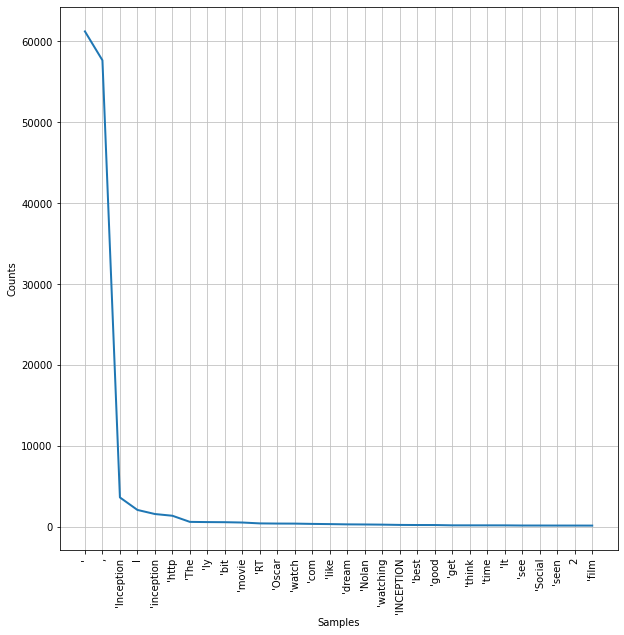

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
plt.figure(figsize=(10,10))
fdist.plot(30)

In [24]:
from wordcloud import WordCloud

In [25]:
type(fdist)

nltk.probability.FreqDist

In [26]:
list(fdist.keys())[:24]

['[',
 "'Watching",
 "'",
 ',',
 "'inception",
 "'Joseph",
 "'gordon",
 "'levitt",
 "'Oh",
 "'yeah",
 "'Ken",
 "'Watanabe",
 "'lt",
 "'Reason",
 "'see",
 "'Inception",
 "'See",
 "'also",
 "'Tom",
 "'Hardy",
 "'NW",
 "'yh",
 "'stale",
 "'girl"]

In [27]:
fdist.most_common(27)

[("'", 61205),
 (',', 57636),
 ("'Inception", 3639),
 ('I', 2095),
 ("'inception", 1590),
 ("'http", 1377),
 ("'The", 619),
 ("'ly", 594),
 ("'bit", 580),
 ("'movie", 540),
 ("'RT", 432),
 ("'Oscar", 412),
 ("'watch", 406),
 ("'com", 369),
 ("'like", 345),
 ("'dream", 312),
 ("'Nolan", 299),
 ("'watching", 279),
 ("'INCEPTION", 244),
 ("'best", 232),
 ("'good", 230),
 ("'get", 192),
 ("'think", 191),
 ("'time", 190),
 ("'It", 188),
 ("'see", 170),
 ("'Social", 169)]

In [28]:
inception = [x[0] for x in fdist.most_common(27)]
inception_count = [x[0] for x in fdsit.most_common(27)]

NameError: name 'fdsit' is not defined

In [38]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies((fdist.keys())[:24])

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

TypeError: 'dict_keys' object is not subscriptable

In [29]:
from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

In [30]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each